In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


import os
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.subplots as sp
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px

from sklearn.cluster import KMeans
import sklearn.preprocessing as pr
import sklearn.metrics as mt
import seaborn as sns
from scipy.stats import chi2_contingency

base_directory = "C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning"
data_directory = os.path.join(base_directory, 'edp_data')
cleaned_data_directory = os.path.join(base_directory, 'resampled_30min_data')

# Directory containing the household profile CSV files
survey_data = pd.read_csv(os.path.join(base_directory, 'survey/edp_survey_aircon.csv'))  # Change this to your output directory
output_directory = os.path.join(base_directory, 'figures')  # Change this to your output directory


NameError: name 'PerformanceWarning' is not defined

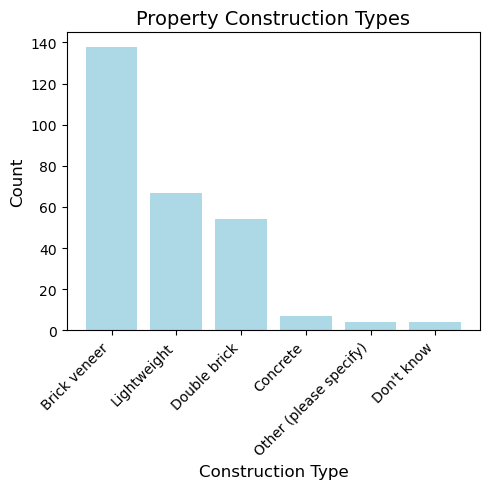

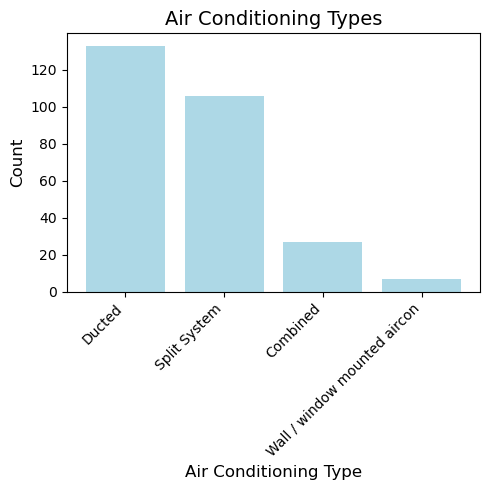

In [2]:


# Initialize lists to store data for the charts
property_construction_data = []
air_con_type_data = []

df = pd.read_csv(os.path.join(base_directory, 'survey/edp_survey_aircon.csv'))

property_construction_data = df['property_construction'].dropna().tolist()
air_con_type_data = df['aircon_type_simplified'].dropna().tolist()

# Function to create and save a bar chart using matplotlib
def create_bar_chart(data, title, xaxis_title, output_file, width=5, height=5):
    # Count occurrences of each type
    counts = pd.Series(data).value_counts()

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(width, height))

    # Create the bar chart
    ax.bar(counts.index, counts.values, color='lightblue')

    # Set chart title and labels
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xaxis_title, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

    # Rotate x-axis labels if needed
    plt.xticks(rotation=45, ha='right')

    # Save the figure to the output file
    plt.tight_layout()
    plt.savefig(output_file, format='png')

    # Show the plot (optional)
    plt.show()

# Create and save the bar charts
create_bar_chart(property_construction_data, 'Property Construction Types', 'Construction Type',
                 os.path.join(output_directory, 'property_construction_types.png'))

create_bar_chart(air_con_type_data, 'Air Conditioning Types', 'Air Conditioning Type',
                 os.path.join(output_directory, 'air_con_type_simplified.png'))


In [12]:
np.random.seed(42)

csv_files = [f for f in os.listdir(cleaned_data_directory)]
random_files = random.sample(csv_files, 3)

print(random_files)

def load_household_data(file):
    df = pd.read_csv(os.path.join(cleaned_data_directory, file), parse_dates=True, index_col='TS')
    return df


subplot_titles = []
for file in random_files:
    subplot_titles.append(f'Total metered consumption (2023) - {file}')
    subplot_titles.append(f'Zoomed Week (Dec 17-27) - {file}')

# Plot for the selected households
fig = sp.make_subplots(rows=3, cols=2, shared_xaxes=False,
                       subplot_titles=subplot_titles)


highlight_start='2023-12-17'
highlight_end='2023-12-27'

# Loop over the 3 randomly selected households and add their data to the plot
for i, file in enumerate(random_files):
    df = load_household_data(file)
    
    # Plot the full year for the current household (left column)
    fig.add_trace(go.Scatter(x=df.index, y=df['Air_Conditioner_Load'], mode='lines',
                             name=f'AirCon Load - {file}', line=dict(color='orange')), row=i+1, col=1)
    fig.add_trace(go.Scatter(x=df.index, y=df['kWh'], mode='lines',
                             name=f'Total Demand - {file}', line=dict(color='deepskyblue')), row=i+1, col=1)
    
    # Include full-year PV data (left column) if available
    if 'PV' in df.columns: 
        fig.add_trace(go.Scatter(x=df.index, y=df['PV'], mode='lines',
                            name=f'PV - {file}', line=dict(color='red')), row=i+1, col=1)

    # Zoom into the specified time range for a week of data (right column)
    df_zoom = df.loc[highlight_start:highlight_end]

    # Plot the zoomed-in week for the current household (right column)
    fig.add_trace(go.Scatter(x=df_zoom.index, y=df_zoom['Air_Conditioner_Load'], mode='lines',
                             name=f'AirCon Load (Zoomed) - {file}', line=dict(color='orange')), row=i+1, col=2)
    fig.add_trace(go.Scatter(x=df_zoom.index, y=df_zoom['kWh'], mode='lines',
                             name=f'Total Demand (Zoomed) - {file}', line=dict(color='deepskyblue')), row=i+1, col=2)
    
    # Include zoomed-in PV data (right column) if available
    if 'PV' in df.columns: 
        fig.add_trace(go.Scatter(x=df_zoom.index, y=df_zoom['PV'], mode='lines',
                        name=f'PV (Zoomed) - {file}', line=dict(color='red')), row=i+1, col=2)

# Update layout
fig.update_layout(height=1200, width=1400, title_text="Electricity and AirCon Load for 3 Random Households",
                  xaxis_title="Time", yaxis_title="Demand (kWh)",
                  showlegend=False)

# Show plot
fig.show()

['W0324_profile.csv', 'S0339_profile.csv', 'W0026_profile.csv']


In [10]:


# Load the edp_survey_aircon dataset (replace with the correct path)
edp_survey_aircon = pd.read_csv(os.path.join(base_directory, "survey/edp_survey_aircon.csv"))

# Assuming 'site_id' and 'climate_zone' columns exist in edp_survey_aircon
climate_zone_mapping = edp_survey_aircon.set_index('edp_site_id')['climate_zone'].to_dict()


In [6]:

# Directory containing the household CSV files
data_dir = cleaned_data_directory

# Initialize an empty DataFrame to store results
all_data = pd.DataFrame()



# Loop through each CSV file in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(data_dir, filename)
        
        # Load the household CSV file
        df = pd.read_csv(file_path)
        
        # Assuming the CSV has 'Date' and 'Air_Conditioner_Load' columns
        df['TS'] = pd.to_datetime(df['TS'])
        df['Month'] = df['TS'].dt.month
        
        # Calculate average daily kWh/day for each month
        df_daily_avg = df.groupby(['Month'])['Air_Conditioner_Load'].mean().reset_index()
        
        # Extract household ID from filename or another column if available
        site_id = filename.split('_')[0]  # Adjust based on filename structure
        
        # Get the climate zone for this household
        climate_zone = climate_zone_mapping.get(site_id, 'Unknown')
        
        # Add the household ID and climate zone to the DataFrame
        df_daily_avg['site_id'] = site_id
        df_daily_avg['climate_zone'] = climate_zone
        
        # Append to the overall DataFrame
        all_data = pd.concat([all_data, df_daily_avg], ignore_index=True)

all_data['climate_zone'] = all_data['climate_zone'].astype(int)

all_data = all_data.sort_values(by=['climate_zone'])


climate_zone_descriptions = {
    1: 'High humidity summer, warm winter (Zone 1)',
    2: 'Warm humid summer, mild winter (Zone 2)',
    3: 'Hot dry summer, warm winter (Zone 3)',
    4: 'Hot dry summer, cool winter (Zone 4)',
    5: 'Warm temperate (Zone 5)',
    6: 'Mild temperate (Zone 6)',
    7: 'Cool temperate (Zone 7)',
    8: 'Alpine (Zone 8)'
}

all_data['climate_zone'] = all_data['climate_zone'].map(climate_zone_descriptions)


In [7]:
%pip install kaleido

# Now, create the box plot faceted by climate zone
all_data = all_data.sort_values(by=['Month'])

fig = px.box(all_data, 
             x='Month', 
             y='Air_Conditioner_Load', 
             facet_col='climate_zone', 
             facet_col_wrap=2,
             color='Month',  # This will color the box plots by month
             title='Monthly Distribution of Daily AC electricity consumption by Climate Zone',
             category_orders = {"climate_zone": ['High humidity summer, warm winter (Zone 1)',
    'Warm humid summer, mild winter (Zone 2)',
    'Hot dry summer, cool winter (Zone 4)',
    'Warm temperate (Zone 5)',
    'Mild temperate (Zone 6)',
    'Cool temperate (Zone 7)']},
             labels={'Month': 'Month', 'Air_Conditioner_Load': 'kWh/day'},
             height=800, width=1000)



# Customize the x-axis labels
fig.update_xaxes(tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# apply y-axis range
def get_yaxis_range(df, column, percentile=95):
    lower_bound = df[column].min()
    upper_bound = df[column].quantile(percentile / 100.0)  # e.g., 95th percentile
    return [lower_bound, upper_bound]

yaxis_range = get_yaxis_range(all_data, 'Air_Conditioner_Load', percentile=99.8)

fig.update_yaxes(range=yaxis_range)

fig.update_layout(showlegend=False)

# Show the plot
fig.show()


import plotly.io as pio

output_file = os.path.join(output_directory, "ac_electricity_consumption_by_climate_zone.png")

fig.write_image(output_file)



Note: you may need to restart the kernel to use updated packages.


In [16]:
unique_site_ids = all_data.groupby('climate_zone')['site_id'].nunique().reset_index()
unique_site_ids.columns = ['climate_zone', 'unique_site_count']

print(unique_site_ids)

                                 climate_zone  unique_site_count
0                     Cool temperate (Zone 7)                 30
1  High humidity summer, warm winter (Zone 1)                  4
2        Hot dry summer, cool winter (Zone 4)                  3
3                     Mild temperate (Zone 6)                 77
4     Warm humid summer, mild winter (Zone 2)                 15
5                     Warm temperate (Zone 5)                117


In [ ]:




# # Add a dummy 'site_id' column (assuming we only have one site in this case, 'W0200')
# file_path = os.path.join(cleaned_data_directory, 'updated_W0200_profile.csv')

# # Load the file
# df = pd.read_csv(file_path)

# df['TS'] = pd.to_datetime(df['TS'])
# # Extract both date and time separately
# df['Date'] = df['TS'].dt.date  # Only the date part
# df['Hour'] = df['TS'].dt.time  # Only the time part (hours and minutes)
# df['Hour'] = df['TS'].dt.strftime('%H:%M')  # Format the time to include only hours and minutes

# # Set the index to the date (if desired)
# df = df.set_index('Date')

# print(df.head())

In [ ]:



# Pivot the table so that rows are dates, columns are times, and values are Air_Conditioner_Load
df_pivot = df.pivot_table(index=['Season', 'Day_Type', 'Date'], 
                          columns='Hour', values='Air_Conditioner_Load')

df_pivot = df_pivot.reset_index()

df_pivot['Season_Day'] = df_pivot['Season'] + " " + df_pivot['Day_Type'] + " " + df_pivot['Date'].astype(str)

df_pivot = df_pivot.sort_values(by='Date')

df_pivot.drop(columns=["Season", "Day_Type", "Date"], inplace=True)

print(df_pivot.head())


In [96]:

# shift column 'C' to first position 
first_column = df_pivot.pop('Season_Day') 
  
# insert column using insert(position,column_name,first_column) function 
df_pivot.insert(0, 'Season_Day', first_column) 

df_pivot.set_index('Season_Day')

Hourly = df_pivot
Hourly = df_pivot.pivot_table(columns = 'Season_Day')


Season_Day  Autumn WD 2023-03-01  Autumn WD 2023-03-02  Autumn WD 2023-03-03  \
Hour                                                                           
00:00                   0.123414              0.115977              0.133702   
00:30                   0.116571              0.132011              0.113555   
01:00                   0.132748              0.126080              0.140782   
01:30                   0.119819              0.105555              0.136209   
02:00                   0.118254              0.120995              0.092719   

Season_Day  Autumn WD 2023-03-06  Autumn WD 2023-03-07  Autumn WD 2023-03-08  \
Hour                                                                           
00:00                   0.143779              0.266318              0.135924   
00:30                   0.145474              0.254280              0.113899   
01:00                   0.144084              0.256229              0.093448   
01:30                   0.146584       

In [97]:
if isinstance(Hourly, pd.DataFrame):
    Hourly_data = Hourly  # Use the DataFrame as it is
else:
    raise ValueError("Hourly must be a pandas DataFrame or Series.")

In [ ]:



plt.figure(num=2, figsize=(15,8))
plt.plot(Hourly, color='c', alpha=0.1, linewidth=3)
plt.plot(Hourly.mean(axis=1),color='k', alpha=1, linewidth='4')
plt.ylabel('Consumption (kWh)', fontsize = 15)
plt.xticks(Hourly.index.astype(str), fontsize = 10, rotation = 45)
plt.xlabel('Time of the Day', fontsize = 15)
leg= mpatches.Patch(color='black', label='Mean Average Hourly Consumption')
plt.legend(handles=[leg])
plt.show()

In [69]:
import os
import pandas as pd

# Directory containing the household CSV files
data_dir = cleaned_data_directory

# Create a complete date range for 2023 in 30-minute increments
date_range = pd.date_range(start='2023-01-01 00:00:00', end='2023-12-31 23:30:00', freq='30T')

# Initialize an empty list to store household DataFrames
household_dfs = []

# Iterate through each CSV file in the directory
for filename in os.listdir(data_dir):
    if filename.endswith("_profile.csv"):
        file_path = os.path.join(data_dir, filename)
        
        # Load the household CSV file
        df = pd.read_csv(file_path)
        
        # Convert the 'TS' column to datetime
        df['TS'] = pd.to_datetime(df['TS'])
        
        # Set 'TS' as the index and extract 'Air_Conditioner_Load'
        df = df.set_index('TS')['Air_Conditioner_Load']
        
        # Extract site ID from the filename (assuming the filename format is 'siteid_profile.csv')
        site_id = filename.split('_')[0]
        
        # Rename the column with the site ID for clarity
        df = df.rename(site_id)
        
        # Reindex the household data to match the complete date range and append it to the list
        household_dfs.append(df.reindex(date_range))

# Concatenate all household DataFrames along the columns (axis=1)
combined_df = pd.concat(household_dfs, axis=1)

# De-fragment the DataFrame by creating a copy
combined_df = combined_df.copy()

# Reset the index and rename the 'index' column to 'Timestamp'
combined_df = combined_df.reset_index()
combined_df = combined_df.rename(columns={'index': 'Timestamp'})

# List of IDs to remove
ids_to_remove = [
    'S0024', 'S0159', 'S0318', 'S0444', 'S0470',
    'W0082', 'W0120', 'W0162', 'W0175', 'W0224',
    'W0241', 'W0243', 'W0315', 'W0324', 'W0330', 'W0310', 'W0335', "W0336",
    "W0213", "S0261", 'S0233', 'W0192', 'S0229', 'W0227', 'W0024', 'S0341'
]

# Drop columns based on the list of IDs to remove
combined_df = combined_df.drop(columns=ids_to_remove, errors='ignore')

# Define the path for the CSV file
csv_path = os.path.join(base_directory, 'combined_aircon_profiles.csv')

# Write to CSV only if the file doesn't already exist
if not os.path.exists(csv_path):
    combined_df.to_csv(csv_path, index=False)
    print(f'File written: {csv_path}')
else:
    print('File already exists!')


File already exists!


In [35]:
# Normalize the data using RobustScaler
def normalize_data(df):
    # Create a copy of the data excluding the 'Timestamp' column
    consumption_data = df.drop(columns=['Timestamp'])

    # Apply RobustScaler to the data
    # scaler = pr.MinMaxScaler(feature_range=(0, 1))
    # scaled_data = scaler.fit_transform(consumption_data)
    scaled_data = consumption_data
    
    # Create a DataFrame for the normalized data, retaining the original column names
    normalized_df = pd.DataFrame(scaled_data, columns=consumption_data.columns)

    # Add the 'Timestamp' column back to the normalized DataFrame
    normalized_df['Timestamp'] = df['Timestamp'].reset_index(drop=True)
    
    return normalized_df

In [83]:
def visualize (df):
    plt.figure(num=2, figsize=(15,8))
    plt.plot(df, color='c', alpha=0.1, linewidth='3')
    plt.plot(df.mean(axis=1),color='k', alpha=1, linewidth='4')
    plt.title(df.name, fontsize = 20)
    plt.ylabel('Normalized Average Hourly Consumption', fontsize = 15)
    plt.xticks(df.index)
    plt.xlabel('Time of the Day', fontsize = 15)
    l = mpatches.Patch(color='black', label='Mean Normalized Average Hourly Consumption')
    plt.legend(handles=[l])
    plt.show()


# Normalize the combined data
normalized_combined_df = normalize_data(combined_df)

# Create a 'Month' column for seasonal filtering
normalized_combined_df['Month'] = normalized_combined_df["Timestamp"].dt.month

# Create seasonal DataFrames
summer = (normalized_combined_df.Month >= 6) & (normalized_combined_df.Month <= 8)  # June to August
Summer_df = normalized_combined_df[summer].reset_index(drop=True)
Summer_df = Summer_df.drop('Month', axis=1)

fall = (normalized_combined_df.Month >= 9) & (normalized_combined_df.Month <= 11)  # September to November
Fall_df = normalized_combined_df[fall].reset_index(drop=True)
Fall_df = Fall_df.drop('Month', axis=1)

winter = (normalized_combined_df.Month <= 2) | (normalized_combined_df.Month == 12)  # January, February, December
Winter_df = normalized_combined_df[winter].reset_index(drop=True)
Winter_df = Winter_df.drop('Month', axis=1)

spring = (normalized_combined_df.Month >= 3) & (normalized_combined_df.Month <= 5)  # March to May
Spring_df = normalized_combined_df[spring].reset_index(drop=True)
Spring_df = Spring_df.drop('Month', axis=1)

# Add a 'Weekday' column to each season DataFrame
for df in [Summer_df, Fall_df, Winter_df, Spring_df]:
    df['Weekday'] = df['Timestamp'].dt.weekday

# Split each season DataFrame into weekdays and weekends
def split_season_by_day_type(season_df, day_type):
    # Add a 'Day_Type' column: 'WD' for weekdays and 'WE' for weekends
    season_df['Day_Type'] = season_df['Weekday'].apply(lambda x: 'WD' if x < 5 else 'WE')
    season_df = season_df[season_df['Day_Type'] == day_type]
    season_df = season_df.drop(['Weekday', 'Day_Type'], axis=1)
    return season_df

# Example usage for each season DataFrame:
# Get weekdays data for summer
summer_weekdays = split_season_by_day_type(Summer_df, 'WD')
# Get weekends data for summer
summer_weekends = split_season_by_day_type(Summer_df, 'WE')
# Similarly for other seasons:
fall_weekdays = split_season_by_day_type(Fall_df, 'WD')
fall_weekends = split_season_by_day_type(Fall_df, 'WE')
winter_weekdays = split_season_by_day_type(Winter_df, 'WD')
winter_weekends = split_season_by_day_type(Winter_df, 'WE')
spring_weekdays = split_season_by_day_type(Spring_df, 'WD')
spring_weekends = split_season_by_day_type(Spring_df, 'WE')

# Now you can process each of these DataFrames further, if needed
def process(df):
    df.name = '%s' % df
    # Changing the resolution of the data to '1 hour'.
    df = df.set_index('Timestamp', drop=True, append=False, inplace=False, verify_integrity=False)

    # Adding a new 'Hour' column to get the hour and minutes of all corresponding timestamps
    df['Hour'] = pd.to_datetime(df.index, format='%H:%M').time
    df['Hour'] = df.Hour.apply(lambda x: x.strftime('%H:%M'))
    df['Date'] = df.index.date

    # Grouping the DataFrame by hour to get 24 hours of the day as index (0 to 23)
    Hourly = df.groupby(['Hour']).mean()

    return Hourly 

# Process the weekday and weekend DataFrames
summer_weekdays = process(summer_weekdays)
summer_weekdays.name = 'Summer (Weekdays)'

summer_weekends = process(summer_weekends)
summer_weekends.name = 'Summer (Weekends)'

fall_weekdays = process(fall_weekdays)
fall_weekdays.name = 'Fall (Weekdays)'

fall_weekends = process(fall_weekends)
fall_weekends.name = 'Fall (Weekends)'

winter_weekdays = process(winter_weekdays)
winter_weekdays.name = 'Winter (Weekdays)'

winter_weekends = process(winter_weekends)
winter_weekends.name = 'Winter (Weekends)'

spring_weekdays = process(spring_weekdays)
spring_weekdays.name = 'Spring (Weekdays)'

spring_weekends = process(spring_weekends)
spring_weekends.name = 'Spring (Weekends)'

print(summer_weekdays.head())   

          S0083     S0089     S0106     S0107     S0110     S0111     S0173  \
Hour                                                                          
00:00  0.007569  0.002198  0.000368  0.027046  0.000244  0.000922  0.002119   
00:30  0.007050  0.001963  0.000371  0.029792  0.000244  0.000918  0.002122   
01:00  0.007372  0.001490  0.000366  0.030635  0.000244  0.000916  0.002118   
01:30  0.007726  0.001448  0.000373  0.029985  0.000243  0.000918  0.002120   
02:00  0.006759  0.001550  0.000364  0.028507  0.000244  0.000916  0.002136   

          S0177     S0179     S0188  ...     W0328     W0329     W0332  \
Hour                                 ...                                 
00:00  0.001086  0.000204  0.079410  ...  0.014671  0.049779  0.084502   
00:30  0.001062  0.000201  0.080432  ...  0.015571  0.049873  0.084628   
01:00  0.001440  0.000166  0.082477  ...  0.016675  0.050156  0.084891   
01:30  0.002204  0.000167  0.082568  ...  0.015040  0.050267  0.084841   
02

In [68]:


# Sum the values across all rows (hours) for each column (household)
daily_consumption = winter_weekdays.sum(axis=0)
threshold_99th = daily_consumption.quantile(0.998)

# Find households in the 98th percentile
households_in_98th = daily_consumption[daily_consumption > threshold_99th].index.tolist()

print(f"Households in the 98th percentile of average daily consumption for:")
print(households_in_98th)

Households in the 98th percentile of average daily consumption for:
['W0024']


Households in the 99.5th percentile of average daily consumption: 

Summer = ['S0233', 'W0192']
Spring = ['S0229', 'W0227']
Fall = ['S0229', 'W0024']
Winter = ['S0341', 'W0024']

['S0233', 'W0192', 'S0229', 'W0227', 'W0024', 'S0341']

In [ ]:
visualize(summer_weekdays)

In [ ]:
visualize(winter_weekdays)

use silouhette method to find optimal number of weekdays 

visualize elbow method of finding optimal number of weekdays 

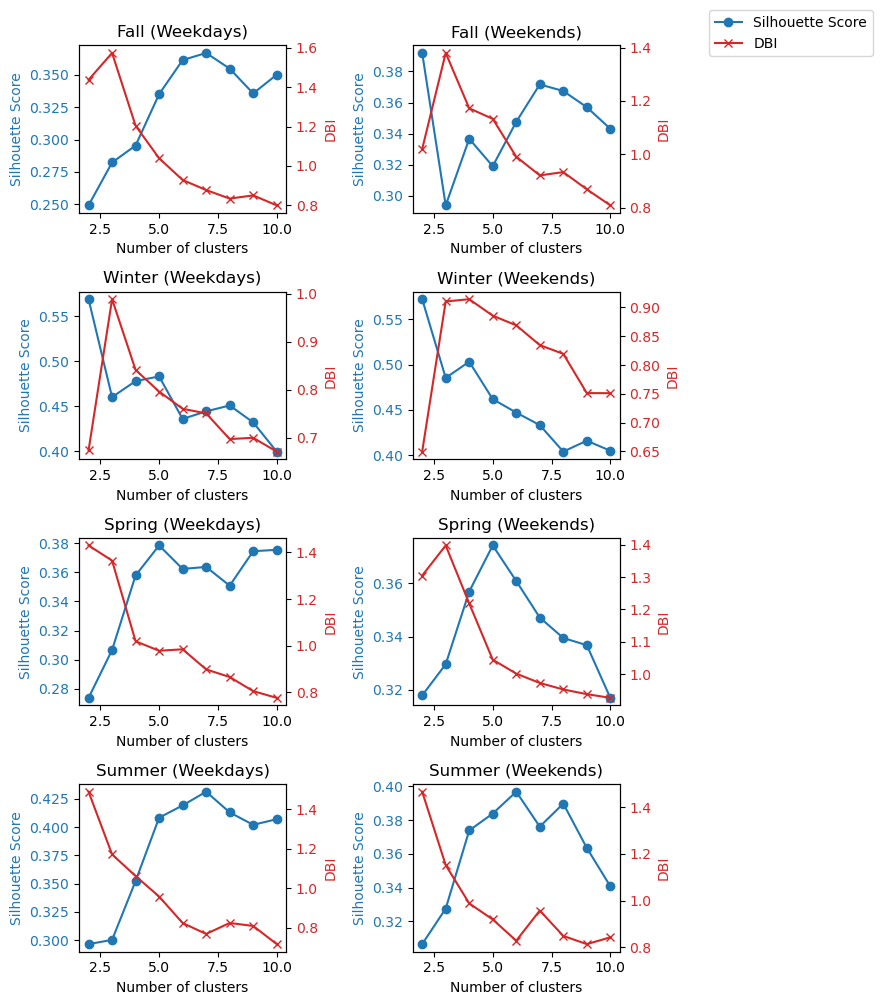

In [74]:
# create silhouette and dbi graph

from sklearn.metrics import silhouette_score, davies_bouldin_score

# Function to calculate both Silhouette and DBI scores
def kmeans_sil_dbi(num_clusters_range, x_vals):
    sil_scores = []
    dbi_scores = []
    
    for k in num_clusters_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(x_vals)
        
        # Silhouette score (only valid for k > 1)
        if k > 1:
            sil_scores.append(silhouette_score(x_vals, labels))
        else:
            sil_scores.append(None)
        
        # Davies-Bouldin Index (only valid for k > 1)
        if k > 1:
            dbi_scores.append(davies_bouldin_score(x_vals, labels))
        else:
            dbi_scores.append(None)
    
    return sil_scores, dbi_scores

# Range of clusters to evaluate
num_clusters_range = range(2, 11)

# List of datasets for different season + weekday/weekend combinations
season_combinations = [
    ('Fall (Weekdays)', fall_weekdays),
    ('Fall (Weekends)', fall_weekends),
    ('Winter (Weekdays)', winter_weekdays),
    ('Winter (Weekends)', winter_weekends),
    ('Spring (Weekdays)', spring_weekdays),
    ('Spring (Weekends)', spring_weekends),
    ('Summer (Weekdays)', summer_weekdays),
    ('Summer (Weekends)', summer_weekends)
]

# Create a 4x2 grid for the subplots
fig, axes = plt.subplots(4, 2, figsize=(7, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through each season + day combination
for idx, (season, df) in enumerate(season_combinations):
    # Calculate silhouette and DBI for the current dataset
    sil_scores, dbi_scores = kmeans_sil_dbi(num_clusters_range, df)
    
    # Create a dual-axis plot for both Silhouette and DBI
    ax1 = axes[idx]
    
    # Plot silhouette score on the left y-axis
    color1 = 'tab:blue'
    ax1.plot(num_clusters_range, sil_scores, color=color1, marker="o", label="Silhouette Score")
    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('Silhouette Score', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_title(f'{season}')
    
    # Create a second y-axis for DBI
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.plot(num_clusters_range, dbi_scores, color=color2, marker="x", label="DBI")
    ax2.set_ylabel('DBI', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    
# Combine both legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(lines_1 + lines_2, labels_1 + labels_2, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [24]:
fig.savefig('figures/silhouettevsdbi_withweekdays.png')

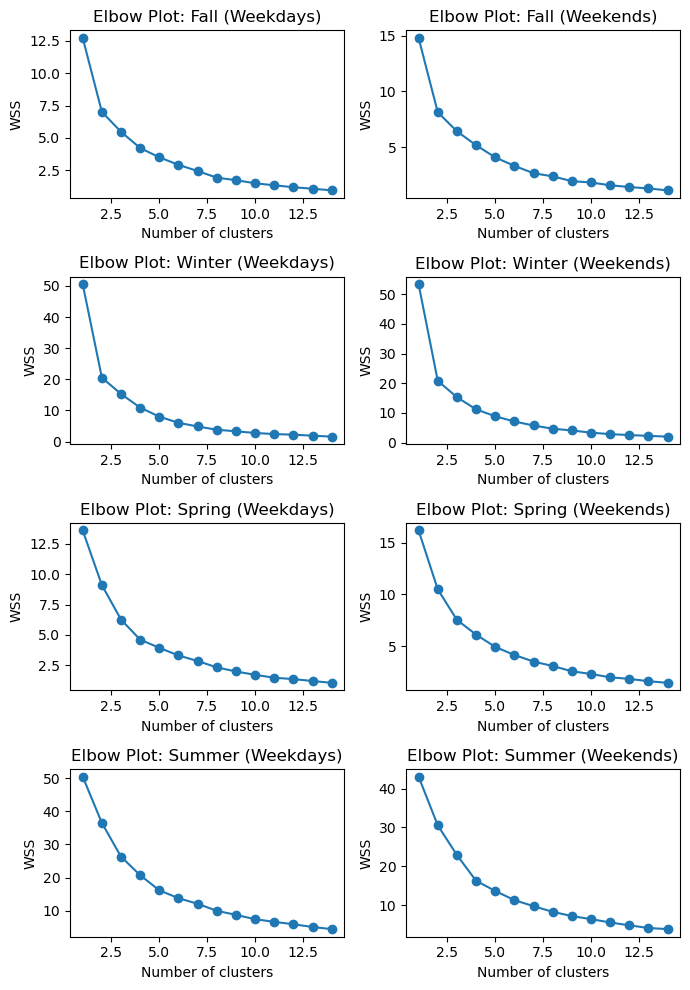

In [25]:
#create elbow graphs
# Define a function to calculate WSS (elbow method)
def kmeans_wss(num_clusters_range, x_vals):
    '''
    Calculates WSS for different values of k using KMeans clustering.

    Args:
        num_clusters_range: (list of ints) - The different k values to try
        x_vals: (DataFrame)                - The data for which to calculate WSS

    Returns:
        wss_values: (list)                 - A list of WSS values, one for each value of k
    '''
    wss_values = []
    for k in num_clusters_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(x_vals)
        wss_values.append(kmeans.inertia_)  # inertia_ is the WSS value
    
    return wss_values

# Set the range of number of clusters to evaluate
num_clusters_range = range(1, 15)

# List of dataframes corresponding to different season + weekday/weekend combinations
season_combinations = [
    ('Fall (Weekdays)', fall_weekdays),
    ('Fall (Weekends)', fall_weekends),
    ('Winter (Weekdays)', winter_weekdays),
    ('Winter (Weekends)', winter_weekends),
    ('Spring (Weekdays)', spring_weekdays),
    ('Spring (Weekends)', spring_weekends),
    ('Summer (Weekdays)', summer_weekdays),
    ('Summer (Weekends)', summer_weekends)
]

# Create a 4x2 grid for the subplots
fig, axes = plt.subplots(4, 2, figsize=(7, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through each season + day combination and plot the elbow graph
for idx, (season, df) in enumerate(season_combinations):
    # Calculate WSS for the current season and day type
    wss_values = kmeans_wss(num_clusters_range, df)
    
    # Plot the WSS values on the appropriate subplot
    axes[idx].plot(num_clusters_range, wss_values, marker="o")
    axes[idx].set_title(f'Elbow Plot: {season}')
    axes[idx].set_xlabel('Number of clusters')
    axes[idx].set_ylabel('WSS')
    
# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()


In [26]:
# export season + weekday csv files

# Define the base directory and the sub-directory 'binned_data'
binned_data_directory = os.path.join(base_directory, "binned_data")

# Create the 'binned_data' directory if it doesn't already exist
os.makedirs(binned_data_directory, exist_ok=True)

# List of dataframes you want to export
dataframes = [
    (fall_weekdays, "Fall_Weekdays.csv"),
    (fall_weekends, "Fall_Weekends.csv"),
    (winter_weekdays, "Winter_Weekdays.csv"),
    (winter_weekends, "Winter_Weekends.csv"),
    (spring_weekdays, "Spring_Weekdays.csv"),
    (spring_weekends, "Spring_Weekends.csv"), 
    (summer_weekdays, "Summer_Weekdays.csv"),
    (summer_weekends, "Summer_Weekends.csv")
]

# Loop through each dataframe and export it as a CSV file
for df, filename in dataframes:
    csv_path = os.path.join(binned_data_directory, filename)
    
    # Check if the file already exists
    if os.path.exists(csv_path):
        print(f"{filename} already exists. Skipping...")
        continue  # Skip to the next iteration if the file exists
    
    df.to_csv(csv_path, index=False)
    print(f"Saved {df.name} as {filename} at {csv_path}")


Saved Fall (Weekdays) as Fall_Weekdays.csv at C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning\binned_data\Fall_Weekdays.csv
Saved Fall (Weekends) as Fall_Weekends.csv at C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning\binned_data\Fall_Weekends.csv
Saved Winter (Weekdays) as Winter_Weekdays.csv at C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning\binned_data\Winter_Weekdays.csv
Saved Winter (Weekends) as Winter_Weekends.csv at C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning\binned_data\Winter_Weekends.csv
Saved Spring (Weekdays) as Spring_Weekdays.csv at C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning\binned_data\Spring_Weekdays.csv
Saved Spring (Weekends) as Spring_Weekends.csv at C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning\binned_data\Spring_Weekends.csv
Saved Summer (Weekdays) as Summer_Weekdays.csv at C:/Users/CEEM04/OneDrive-Emily/OneDrive - UNSW/edpdatacleaning\binned_data\Summer_Weekdays.c

Decided on cluster number of 5 due to DBI and silhouette visualizations

In [72]:
num_clusters = 6

def cluster(x, num_clusters):
    y=x.T # Since we need to assign households to clusters and not hour of the day, the dataframe is transposed
    cluster = KMeans(n_clusters=num_clusters, random_state=42)
    # Adding a new column 'cluster_number' containing cluster assignment (0, 1 or 2) for each household.
    y['cluster_number']=cluster.fit_predict(y[y.columns[0:]])
    y.name = x.name
    return y


s_wd_cl = cluster(summer_weekdays, num_clusters)
s_we_cl = cluster(summer_weekends, num_clusters)
f_wd_cl = cluster(fall_weekdays, num_clusters)
f_we_cl = cluster(fall_weekends, num_clusters)
w_wd_cl = cluster(winter_weekdays, num_clusters)
w_we_cl = cluster(winter_weekends, num_clusters)
sp_wd_cl = cluster(spring_weekdays, num_clusters)
sp_we_cl = cluster(spring_weekends, num_clusters)


def cluster_visualization(x, num_clusters, ax):
    ax.set_xlabel('Time of the Day', fontsize=12)
    ax.set_ylabel('Average Electricity Consumption (kWh)', fontsize=12)
    ax.set_ylim(0,3.5)
    ax.set_title(x.name, fontsize=14)
    # Setting the x-axis limits
    #ax.set_xlim(0, 25)  # Adjusting to the range for 30-min intervals in a 24-hour day (48 intervals)
    
    # Set ticks for every hour, considering the 30-min intervals
    ax.set_xticks(range(0, 48, 4))  # Ticks every 2 intervals (1 hour)
    ax.set_xticklabels([f"{i//2}:00" for i in range(0, 48, 4)])  # Formatting for hour labels
   
    ax.tick_params(axis='x', labelrotation=45)
    
    colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))
    legend_handles = []

    for i in range(num_clusters):
        cluster_data = x[x.cluster_number == i].reset_index(drop=True).drop(['cluster_number'], axis=1)

        # Plot the mean of the cluster
        ax.plot(cluster_data.mean(), color=colors[i], label=f'Cluster {i+1}')
        ax.plot(cluster_data.T, color=colors[i], alpha=0.02)

        # Create legend handles
        legend_handles.append(mpatches.Patch(color=colors[i], label=f'Cluster {i+1}'))

    ax.legend(handles=legend_handles, loc='upper right', fontsize=10)

C:\Users\CEEM04\AppData\Local\Temp\ipykernel_9400\251630479.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Processing date: 2023-03-01, data shape: (48, 222)
Processing date: 2023-03-02, data shape: (48, 222)
Processing date: 2023-03-03, data shape: (48, 222)
Processing date: 2023-03-04, data shape: (48, 222)
Processing date: 2023-03-05, data shape: (48, 222)
Daily optimal clusters comparison processed.
        Date  DTW_OptimalClusters  DTW_Score  DTW_Silhouette   DTW_DBI
0 2023-03-01                    4   1.000000        0.568168  2.141642
1 2023-03-02                    4   0.985112        0.553398  2.316830
2 2023-03-03                    4   1.000000        0.584427  1.941993
3 2023-03-04                    5   1.000000        0.516608  1.818783
4 2023-03-05                    8   0.504437        0.296775  3.759449


C:\Users\CEEM04\AppData\Local\Temp\ipykernel_9400\251630479.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Processing date: 2023-03-01, data shape: (48, 222)
Processing date: 2023-03-02, data shape: (48, 222)
Processing date: 2023-03-03, data shape: (48, 222)
Processing date: 2023-03-04, data shape: (48, 222)
Processing date: 2023-03-05, data shape: (48, 222)
Daily optimal clusters comparison processed.
        Date  DTW_OptimalClusters  DTW_Score  DTW_Silhouette   DTW_DBI
0 2023-03-01                    4   1.000000        0.568168  2.141642
1 2023-03-02                    4   0.985112        0.553398  2.316830
2 2023-03-03                    4   1.000000        0.584427  1.941993
3 2023-03-04                    5   1.000000        0.516608  1.818783
4 2023-03-05                    8   0.504437        0.296775  3.759449


In [77]:
# visualizing the different assignments 

Assignment_df = pd.DataFrame(data=None, index=s_wd_cl.index, columns=None, dtype=None, copy=False)
Assignment_df['Summer Weekdays'] = s_wd_cl['cluster_number']
Assignment_df['Summer Weekends'] = s_we_cl['cluster_number']
Assignment_df['Fall Weekdays'] = f_wd_cl['cluster_number']
Assignment_df['Fall Weekends'] = f_we_cl['cluster_number']
Assignment_df['Winter Weekdays'] = w_wd_cl['cluster_number']
Assignment_df['Winter Weekends'] = w_we_cl['cluster_number']
Assignment_df['Spring Weekdays'] = sp_wd_cl['cluster_number']
Assignment_df['Spring Weekends'] = sp_we_cl['cluster_number']
Assignment_df.head()


Summer Weekdays  Summer Weekends  Fall Weekdays  Fall Weekends  \
S0083                1                2              5              2   
S0089                1                2              5              2   
S0106                1                2              5              2   
S0107                1                2              5              2   
S0110                1                2              5              2   

       Winter Weekdays  Winter Weekends  Spring Weekdays  Spring Weekends  
S0083                0                0                1                1  
S0089                3                3                1                1  
S0106                3                3                1                1  
S0107                3                0                1                1  
S0110                0                0                1                1

In [75]:
## find the most common cluster combinations

Summer_merged = pd.DataFrame(data=None, index=s_wd_cl.index, columns=None, dtype=None, copy=False)
Summer_merged['Combo'] = sp_wd_cl['cluster_number'].astype(str) + ', ' + sp_we_cl['cluster_number'].astype(str)




combo_frequency = Summer_merged['Combo'].value_counts()

# Convert the Series to a DataFrame for better readability
combo_frequency_df = combo_frequency.reset_index()
combo_frequency_df.columns = ['Combo', 'Frequency']

# Display the result
print(combo_frequency_df)

   Combo  Frequency
0   1, 1         98
1   0, 3         26
2   1, 3         19
3   0, 0         16
4   4, 2         12
5   3, 4          9
6   3, 2          7
7   5, 5          7
8   3, 3          5
9   2, 4          4
10  0, 2          3
11  4, 3          3
12  2, 5          2
13  3, 0          2
14  4, 0          2
15  1, 0          2
16  0, 1          1
17  4, 5          1
18  2, 2          1
19  4, 4          1


In [51]:
filtered_rows = Summer_merged.loc[Summer_merged['Combo'] == "2, 4"]

# Print the filtered rows
print(filtered_rows)

      Combo
W0227  2, 4


65 % of the data (150/230) can be explained by the top 4 combinations of load profiles for weekdays and weekends. Indication that the pre-binning by weekdays/weekends is unnecessary?

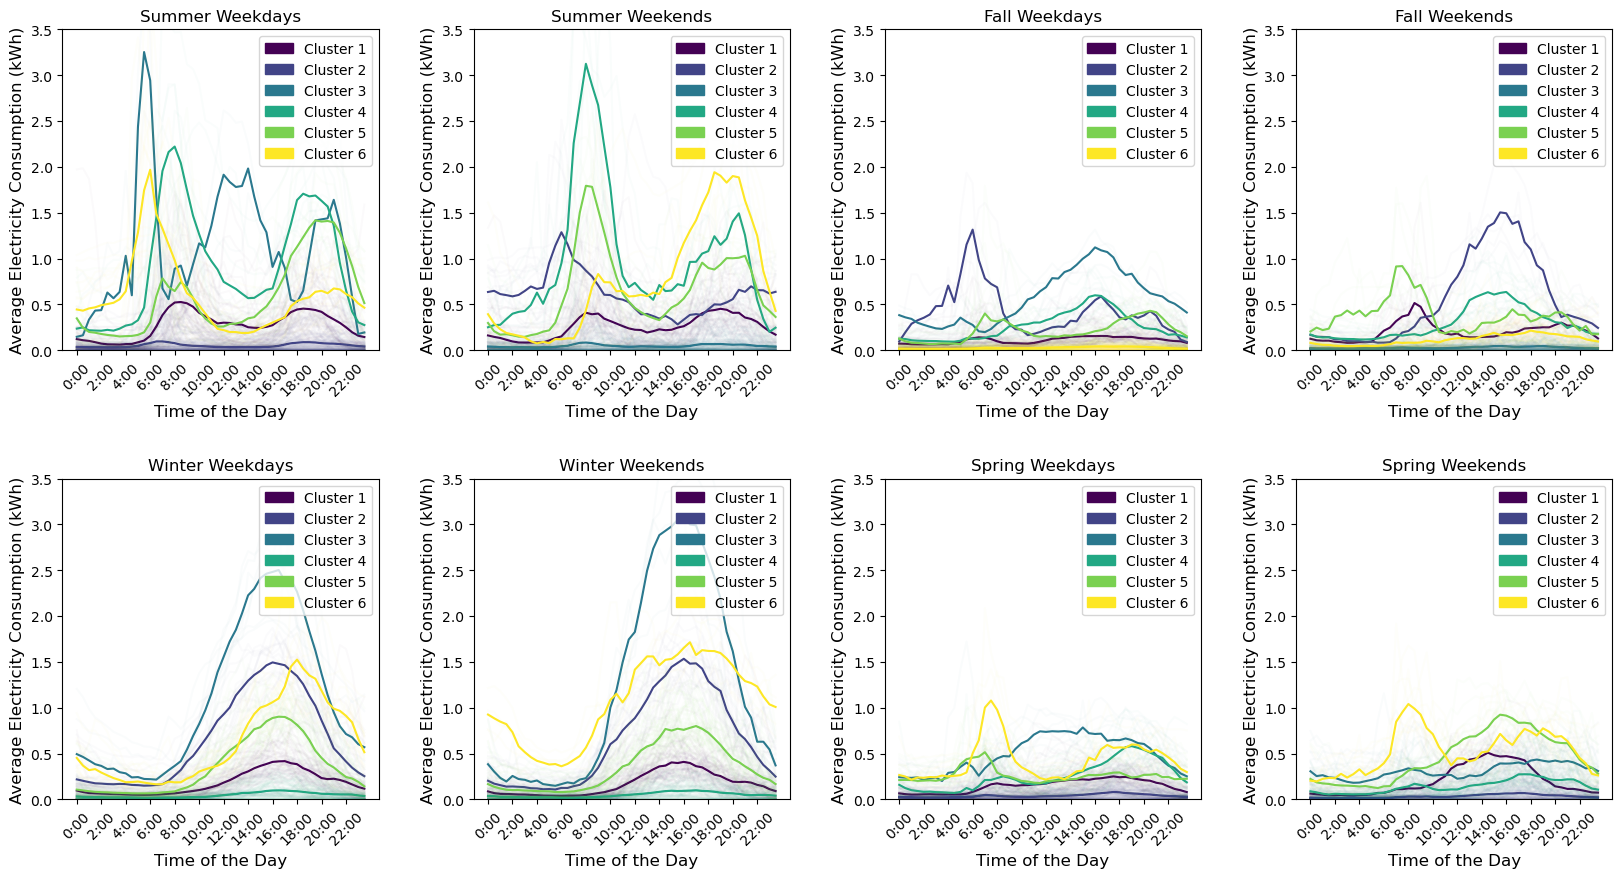

In [73]:
# Create a grid for subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between subplots

# Fill in the subplots with visualizations
cluster_visualization(s_wd_cl, num_clusters, axs[0, 0])
axs[0, 0].set_title('Summer Weekdays')

cluster_visualization(s_we_cl, num_clusters, axs[0, 1])
axs[0, 1].set_title('Summer Weekends')

cluster_visualization(f_wd_cl, num_clusters, axs[0, 2])
axs[0, 2].set_title('Fall Weekdays')

cluster_visualization(f_we_cl, num_clusters, axs[0, 3])
axs[0, 3].set_title('Fall Weekends')

cluster_visualization(w_wd_cl, num_clusters, axs[1, 0])
axs[1, 0].set_title('Winter Weekdays')

cluster_visualization(w_we_cl, num_clusters, axs[1, 1])
axs[1, 1].set_title('Winter Weekends')

cluster_visualization(sp_wd_cl, num_clusters, axs[1, 2])
axs[1, 2].set_title('Spring Weekdays')

cluster_visualization(sp_we_cl, num_clusters, axs[1, 3])
axs[1, 3].set_title('Spring Weekends')

plt.show()


In [ ]:
plt.savefig('figures/cluster_visualization.png')

In [32]:
print(survey_data.head())

  edp_site_id  postcode state   property_construction  \
0       S0024      4557   QLD            Brick veneer   
1       S0083      2257   NSW            Brick veneer   
2       S0089      5352    SA            Brick veneer   
3       S0106      2515   NSW  Other (please specify)   
4       S0107      3146   VIC             Lightweight   

                       property_construction_other  property_star_rating  \
0  Mix Brick Veneer and fibreboard on timber frame                   0.0   
1                                                0                   0.0   
2                                                0                   0.0   
3                                                0                   0.0   
4                                                0                   0.0   

  num_bedrooms num_occupants   aircon_type aircon_type_simplified  \
0            4             4        Ducted                 Ducted   
1    5 or more             5  Split System           Split Sys

In [78]:
# Assuming the index in your cluster data is 'site_id' and matches 'site_id' in edp_survey
Clusters_merged = Assignment_df.merge(survey_data, left_index=True, right_on='edp_site_id', how='left')
#merged_s_we_cl = Assignment_df.merge(survey_data, left_index=True, right_on='edp_site_id', how='left')
# Do the same for other cluster dataframes...

print(Clusters_merged.columns)

Index(['Summer Weekdays', 'Summer Weekends', 'Fall Weekdays', 'Fall Weekends',
       'Winter Weekdays', 'Winter Weekends', 'Spring Weekdays',
       'Spring Weekends', 'edp_site_id', 'postcode', 'state',
       'property_construction', 'property_construction_other',
       'property_star_rating', 'num_bedrooms', 'num_occupants', 'aircon_type',
       'aircon_type_simplified', 'num_rooms_aircon', 'num_rooms_heated',
       'climate_zone'],
      dtype='object')


In [79]:

climate_zone_descriptions = {
    1: 'High humidity summer, warm winter (Zone 1)',
    2: 'Warm humid summer, mild winter (Zone 2)',
    3: 'Hot dry summer, warm winter (Zone 3)',
    4: 'Hot dry summer, cool winter (Zone 4)',
    5: 'Warm temperate (Zone 5)',
    6: 'Mild temperate (Zone 6)',
    7: 'Cool temperate (Zone 7)',
    8: 'Alpine (Zone 8)'
}

Clusters_merged['climate_zone'] = Clusters_merged['climate_zone'].map(climate_zone_descriptions)

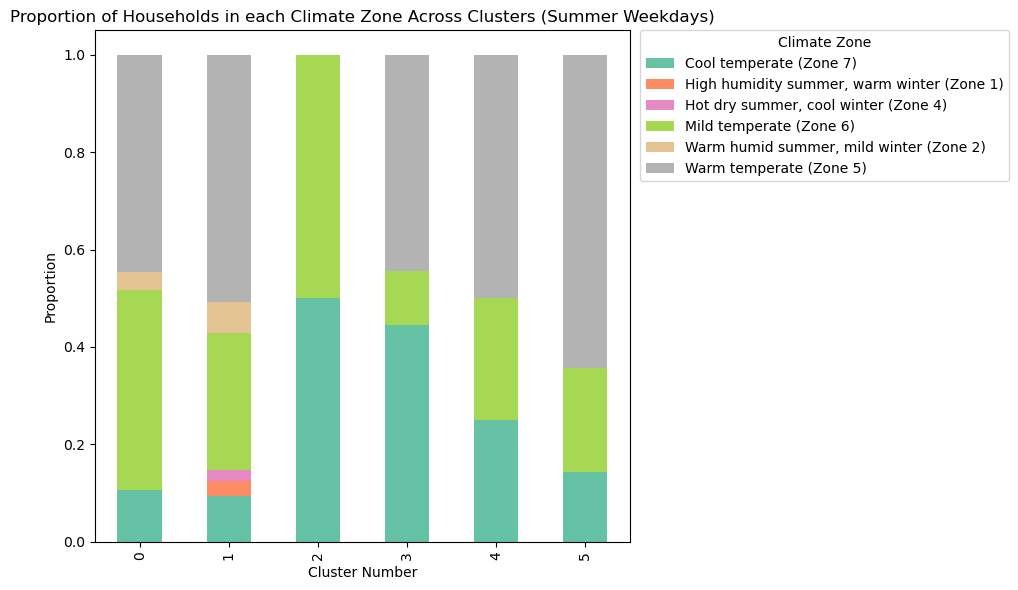

In [82]:
# Example: Plot the proportion of different income groups for Summer Weekdays clusters


# Step 1: Calculate the proportion of each climate zone within each cluster
cluster_counts = Clusters_merged.groupby(['Summer Weekdays', 'climate_zone']).size().unstack().fillna(0)

# Step 2: Normalize to get proportions
cluster_proportions = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

# Step 3: Create the stacked bar chart
plt.figure(figsize=(10, 6))

# Create a stacked bar plot
cluster_proportions.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())

# Set labels and title
plt.title('Proportion of Households in each Climate Zone Across Clusters (Summer Weekdays)')
plt.xlabel('Cluster Number')
plt.ylabel('Proportion')

# Add legend
plt.legend(title='Climate Zone', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.tight_layout()
plt.show()


In [55]:
contingency_table = pd.crosstab(Clusters_merged['Summer Weekdays'], Clusters_merged['climate_zone'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square Statistic: {chi2}, p-value: {p_value}')

Chi-square Statistic: 22.321849506633185, p-value: 0.09963831265112072
